In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [49]:
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Total no of apps
print('Total number of apps in dataset = ', apps.App.count())

apps.sample(5) # Looking at random sample of dataset

Total number of apps in dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3426,4316,Anna.K Tarot,FAMILY,4.8,17,23M,100+,Paid,$3.99,Mature 17+,Entertainment,"January 16, 2017",1.4.4,4.0.3 and up
555,656,Titanic App - Feminist Dating Application,DATING,4.5,120,10M,500+,Free,0,Mature 17+,Dating,"August 4, 2018",1.5-beta,5.0 and up
3757,4673,VMate,VIDEO_PLAYERS,4.2,192677,17M,"50,000,000+",Free,0,Teen,Video Players & Editors,"August 3, 2018",1.78,4.0.3 and up
5070,6064,Be My Princess,FAMILY,4.2,3103,8.8M,"100,000+",Free,0,Teen,Entertainment,"September 19, 2017",6.5,2.2 and up
7921,9040,DX Simulation for OOO Dx Belt,FAMILY,4.6,67,31M,"10,000+",Free,0,Everyone,Simulation,"August 4, 2018",1.7,4.1 and up


### Data cleaning

In [50]:
chars_to_remove = ['+', '$', 'M', ',']
cols_to_clean = ['Installs', 'Size', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
        
    apps[col] = pd.to_numeric(apps[col], errors = 'coerce')

In [51]:
# total no of unique categories

num_categories = len(apps.Category.unique())
print(f"Number of categories = {num_categories}")

Number of categories = 33


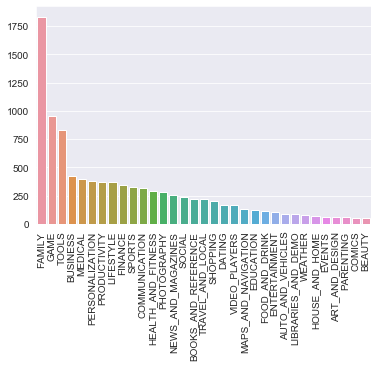

In [52]:
num_of_apps_in_category = apps.Category.value_counts().sort_values(ascending = False)

sns.barplot(x = num_of_apps_in_category.index, y = num_of_apps_in_category.values)
plt.xticks(rotation = 90)
plt.show()

We can se that there are 33 different categories of apps in our dataset in which **_Family_** and **_Game_** apps have the highest market. 

Tools, Medical and Business apps are also at the top

### Distribution of app ratings

In [53]:
avg_app_rating = apps.Rating.mean()
print(f"Average app rating : {avg_app_rating}")

Average app rating : 4.173243045387998


Average ratings across all app categories is 4.17

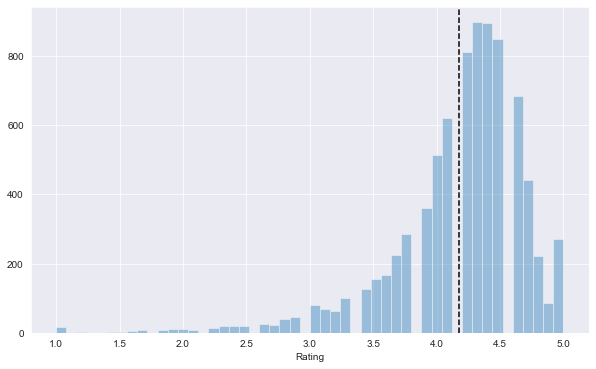

In [54]:
plt.figure(figsize = (10, 6))
sns.distplot(apps.Rating, kde = False)
plt.axvline(avg_app_rating, color = 'black', linestyle = '--')
plt.show()

The histogram plot is skewed to right indicating that the majority of apps are highly rated with only a few exceptions in low-rated apps  

### Size and price of an app 

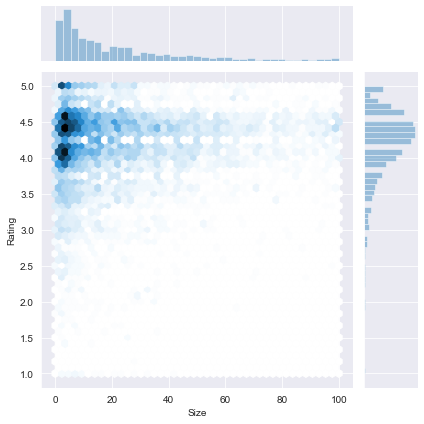

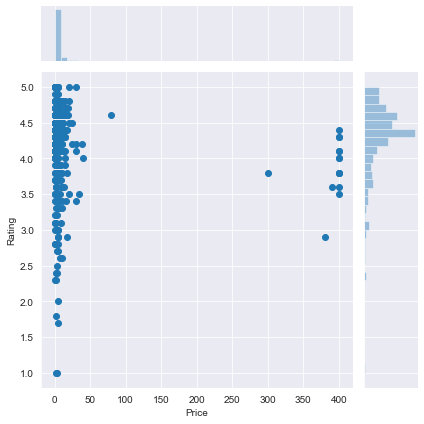

In [56]:
# plot size vs rating
plt1 = sns.jointplot(x = apps.Size, y = apps.Rating, kind = 'hex')

# subsetting apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# plot price vs rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

plt.show()

We find that the majority of top rated apps (rating over 4) range from 2MB to 20MB. 

We also find that the vast majority of apps price themselves under $10.

### Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


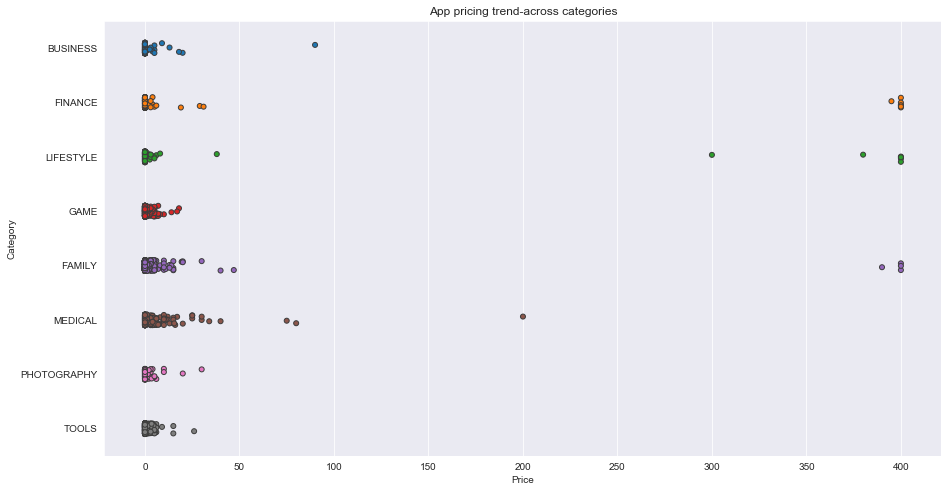

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# select few popular apps categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                           'MEDICAL', 'TOOLS', 'FINANCE',
                                           'LIFESTYLE', 'BUSINESS'])]
# examine the trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats.Price, y = popular_app_cats.Category, jitter = True, linewidth = 1)
ax.set_title('App pricing trend-across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

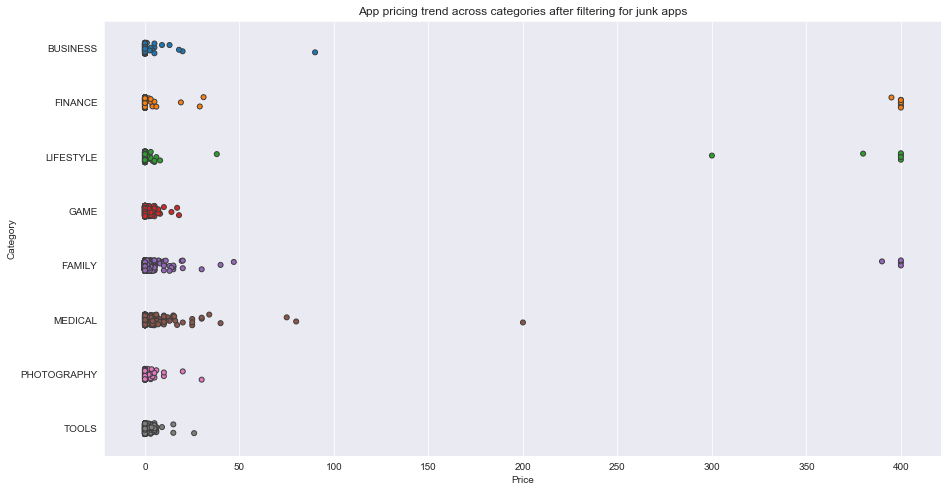

In [62]:
# select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with authentic apps
ax = sns.stripplot(x = popular_app_cats.Price, y = popular_app_cats.Category, data = apps_under_100,
                   jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### Popularity of paid apps vs free apps

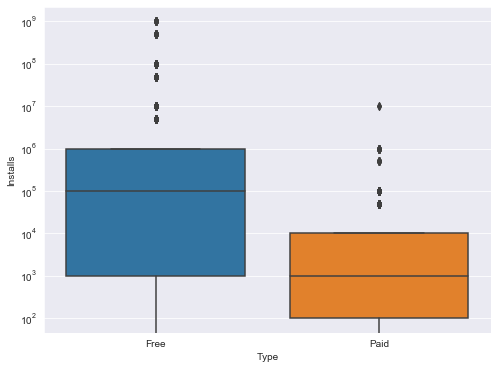

In [85]:
plt.figure(figsize = (8, 6))
ax = sns.boxplot(x = 'Type', y = 'Installs', data = apps)
ax.set_yscale("log")
#ax.set_xticks([1, 100, 10000, 1000000, 100000000])
#ax.set_xlabels(['1', '100', '10K', '1M', '100M'])
plt.show()

Thus we can conclude that paid apps have a relative lower number of installs than free apps.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

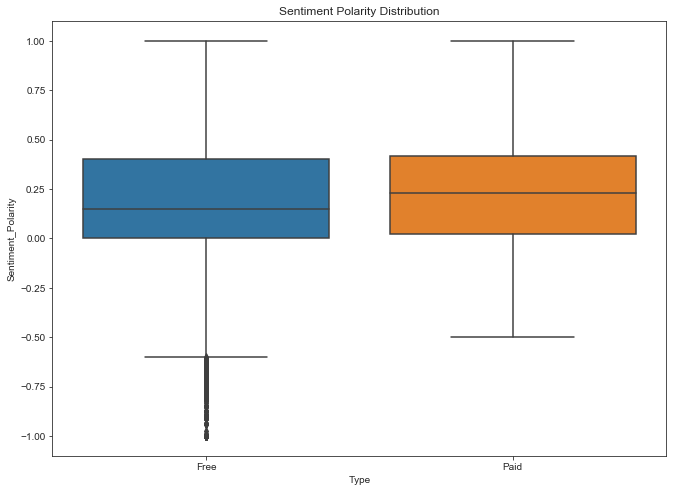

In [87]:
reviews_df = pd.read_csv('datasets/user_reviews.csv')

merged_df = pd.merge(apps, reviews_df, on = 'App', how = 'inner')

merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')